In [1]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt

In [2]:
# beta_schedule function
def _warmup_beta(linear_start, linear_end, n_timestep, warmup_frac):
    betas = linear_end * np.ones(n_timestep, dtype=np.float64)
    warmup_time = int(n_timestep * warmup_frac)
    betas[:n_timestep-warmup_time] = np.linspace(
        linear_start, linear_end, n_timestep-warmup_time, dtype=np.float64)
    return betas

def make_beta_schedule(schedule, n_timestep, linear_start=1e-6, linear_end=1e-2, cosine_s=8e-3):
    if schedule == 'quad':
        betas = np.linspace(linear_start ** 0.5, linear_end ** 0.5,
                            n_timestep, dtype=np.float64) ** 2

    elif schedule == 'cube':
        betas = np.linspace(linear_start ** (1/3), linear_end ** (1/3),
                            n_timestep, dtype=np.float64) ** 3
    elif schedule == 'linear':
        betas = np.linspace(linear_start, linear_end,
                            n_timestep, dtype=np.float64)
    elif schedule == 'warmup10':
        betas = _warmup_beta(linear_start, linear_end,
                             n_timestep, 0.1)
    elif schedule == 'warmup25':
        betas = _warmup_beta(linear_start, linear_end,
                             n_timestep, 0.25)
    elif schedule == 'warmup50':
        betas = _warmup_beta(linear_start, linear_end,
                             n_timestep, 0.5)
    elif schedule == 'const':
        betas = linear_end * np.ones(n_timestep, dtype=np.float64)
    elif schedule == 'jsd':  # 1/T, 1/(T-1), 1/(T-2), ..., 1
        betas = 1. / np.linspace(n_timestep,
                                 1, n_timestep, dtype=np.float64) * linear_end
    elif schedule == "cosine":
        timesteps = (
            torch.arange(n_timestep + 1, dtype=torch.float64) /
            n_timestep + cosine_s
        )
        alphas = timesteps / (1 + cosine_s) * math.pi / 2
        alphas = torch.cos(alphas).pow(2)
        alphas = alphas / alphas[0]
        betas = 1 - alphas[1:] / alphas[:-1]
        betas = betas.clamp(max=0.999) * linear_end
    elif schedule == 'geometric':
        betas = np.geomspace(linear_start, linear_end, n_timestep, dtype=np.float64)
    else:
        raise NotImplementedError(schedule)
    return betas



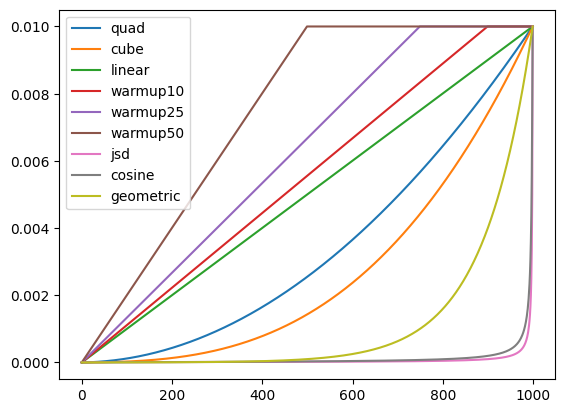

In [4]:
plt.plot(make_beta_schedule('quad', 1000), label='quad')
plt.plot(make_beta_schedule('cube', 1000), label='cube')
plt.plot(make_beta_schedule('linear', 1000), label='linear')
plt.plot(make_beta_schedule('warmup10', 1000), label='warmup10')
plt.plot(make_beta_schedule('warmup25', 1000), label='warmup25')
plt.plot(make_beta_schedule('warmup50', 1000), label='warmup50')
plt.plot(make_beta_schedule('jsd', 1000), label='jsd')
plt.plot(make_beta_schedule("cosine", 1000), label="cosine")
plt.plot(make_beta_schedule('geometric', 1000), label='geometric')
plt.legend()